<a href="https://colab.research.google.com/github/ArovaSyams/machine_learning/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make Unsupervised Learning model with K-means Clustering

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# make df
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# rename columns
df = df.rename(columns={
    "Gender": "gender",
    "Male": "male",
    "Annual Income (k$)": "annual_income",
    "Spending Score (1-100)": "spending_score"
})

# change kategorik data to numerik data
df["gender"].replace(["Female", "Male"], [0, 1], inplace=True)

df.head()

,CustomerID,gender,Age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [9]:
# drop customer id and gender
X = df.drop(["CustomerID", "gender"], axis=1)

# make list that contain inertia, to define how many cluster needed with elbow method
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

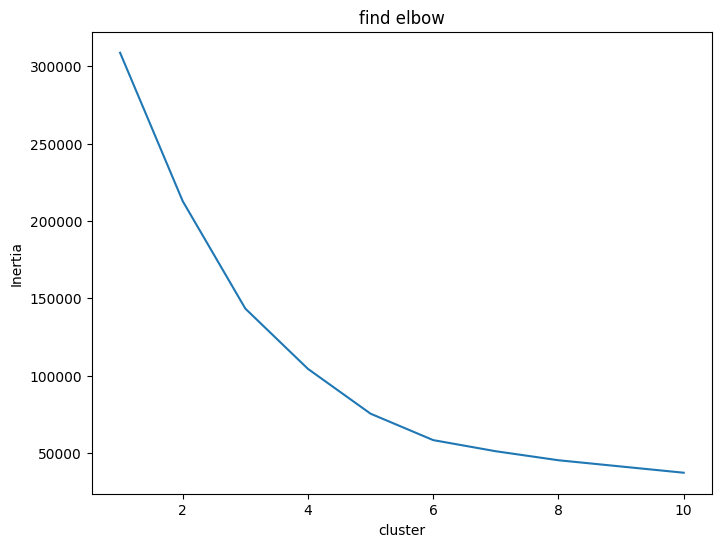

In [17]:
# membuat plot inertia
fig, ax =plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title("find elbow")
ax.set_xlabel("cluster")
ax.set_ylabel("Inertia")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'K-Means with 5 Cluster')

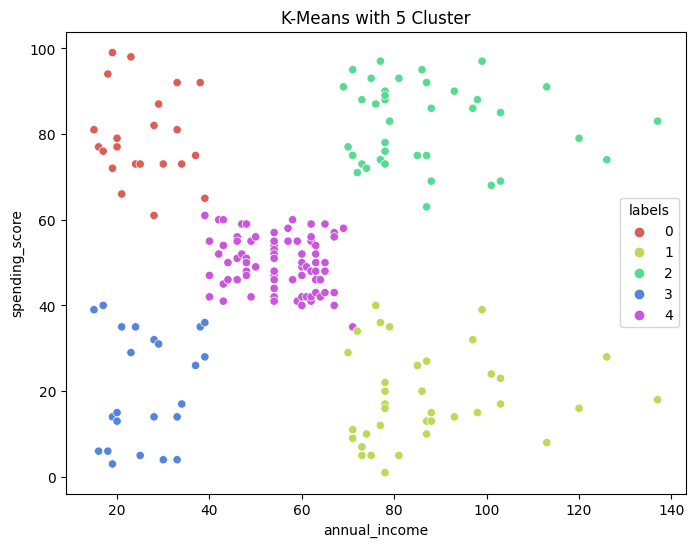

In [21]:
# make k-means object
km5 = KMeans(n_clusters=5).fit(X)

# add labels column to df
X["labels"] = km5.labels_

# make a plot with 5 cluster
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x=X["annual_income"], y=X["spending_score"], hue=X["labels"], palette=sns.color_palette("hls", 5))
ax.set_title("K-Means with 5 Cluster")